In [143]:
import graphviz

import pandas as pd
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

import statsmodels.formula.api as smf
from statsmodels.api import qqplot, add_constant

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

from statsmodels.discrete.discrete_model import Logit


import graphviz

import pandas as pd
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import export_graphviz
import graphviz

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV

from statsmodels.api import Logit

from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier


import os

import warnings
warnings.filterwarnings("ignore")

from sklearn.decomposition import PCA

import statsmodels.api as sm

In [2]:
# 글씨체 분석
matplotlib.rc("font", family = "NanumGothic")
matplotlib.rc("axes", unicode_minus = False )

# 1. 다중 선형 회귀 분석

In [3]:
# 데이터 불러오기
df_raw = pd.read_csv("/home/piai/바탕화면/실습화일/2. Big Data 분석/Concrete.csv", encoding = "euc-kr")
df_raw.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [4]:
# 결측치 확인
df_raw.isnull().sum()

cement                0
blast_furnace_slag    0
fly_ash               0
water                 0
superplasticizer      0
coarse_aggregate      0
fine_aggregate        0
age                   0
strength              0
dtype: int64

In [5]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   cement              1030 non-null   float64
 1   blast_furnace_slag  1030 non-null   float64
 2   fly_ash             1030 non-null   float64
 3   water               1030 non-null   float64
 4   superplasticizer    1030 non-null   float64
 5   coarse_aggregate    1030 non-null   float64
 6   fine_aggregate      1030 non-null   float64
 7   age                 1030 non-null   int64  
 8   strength            1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


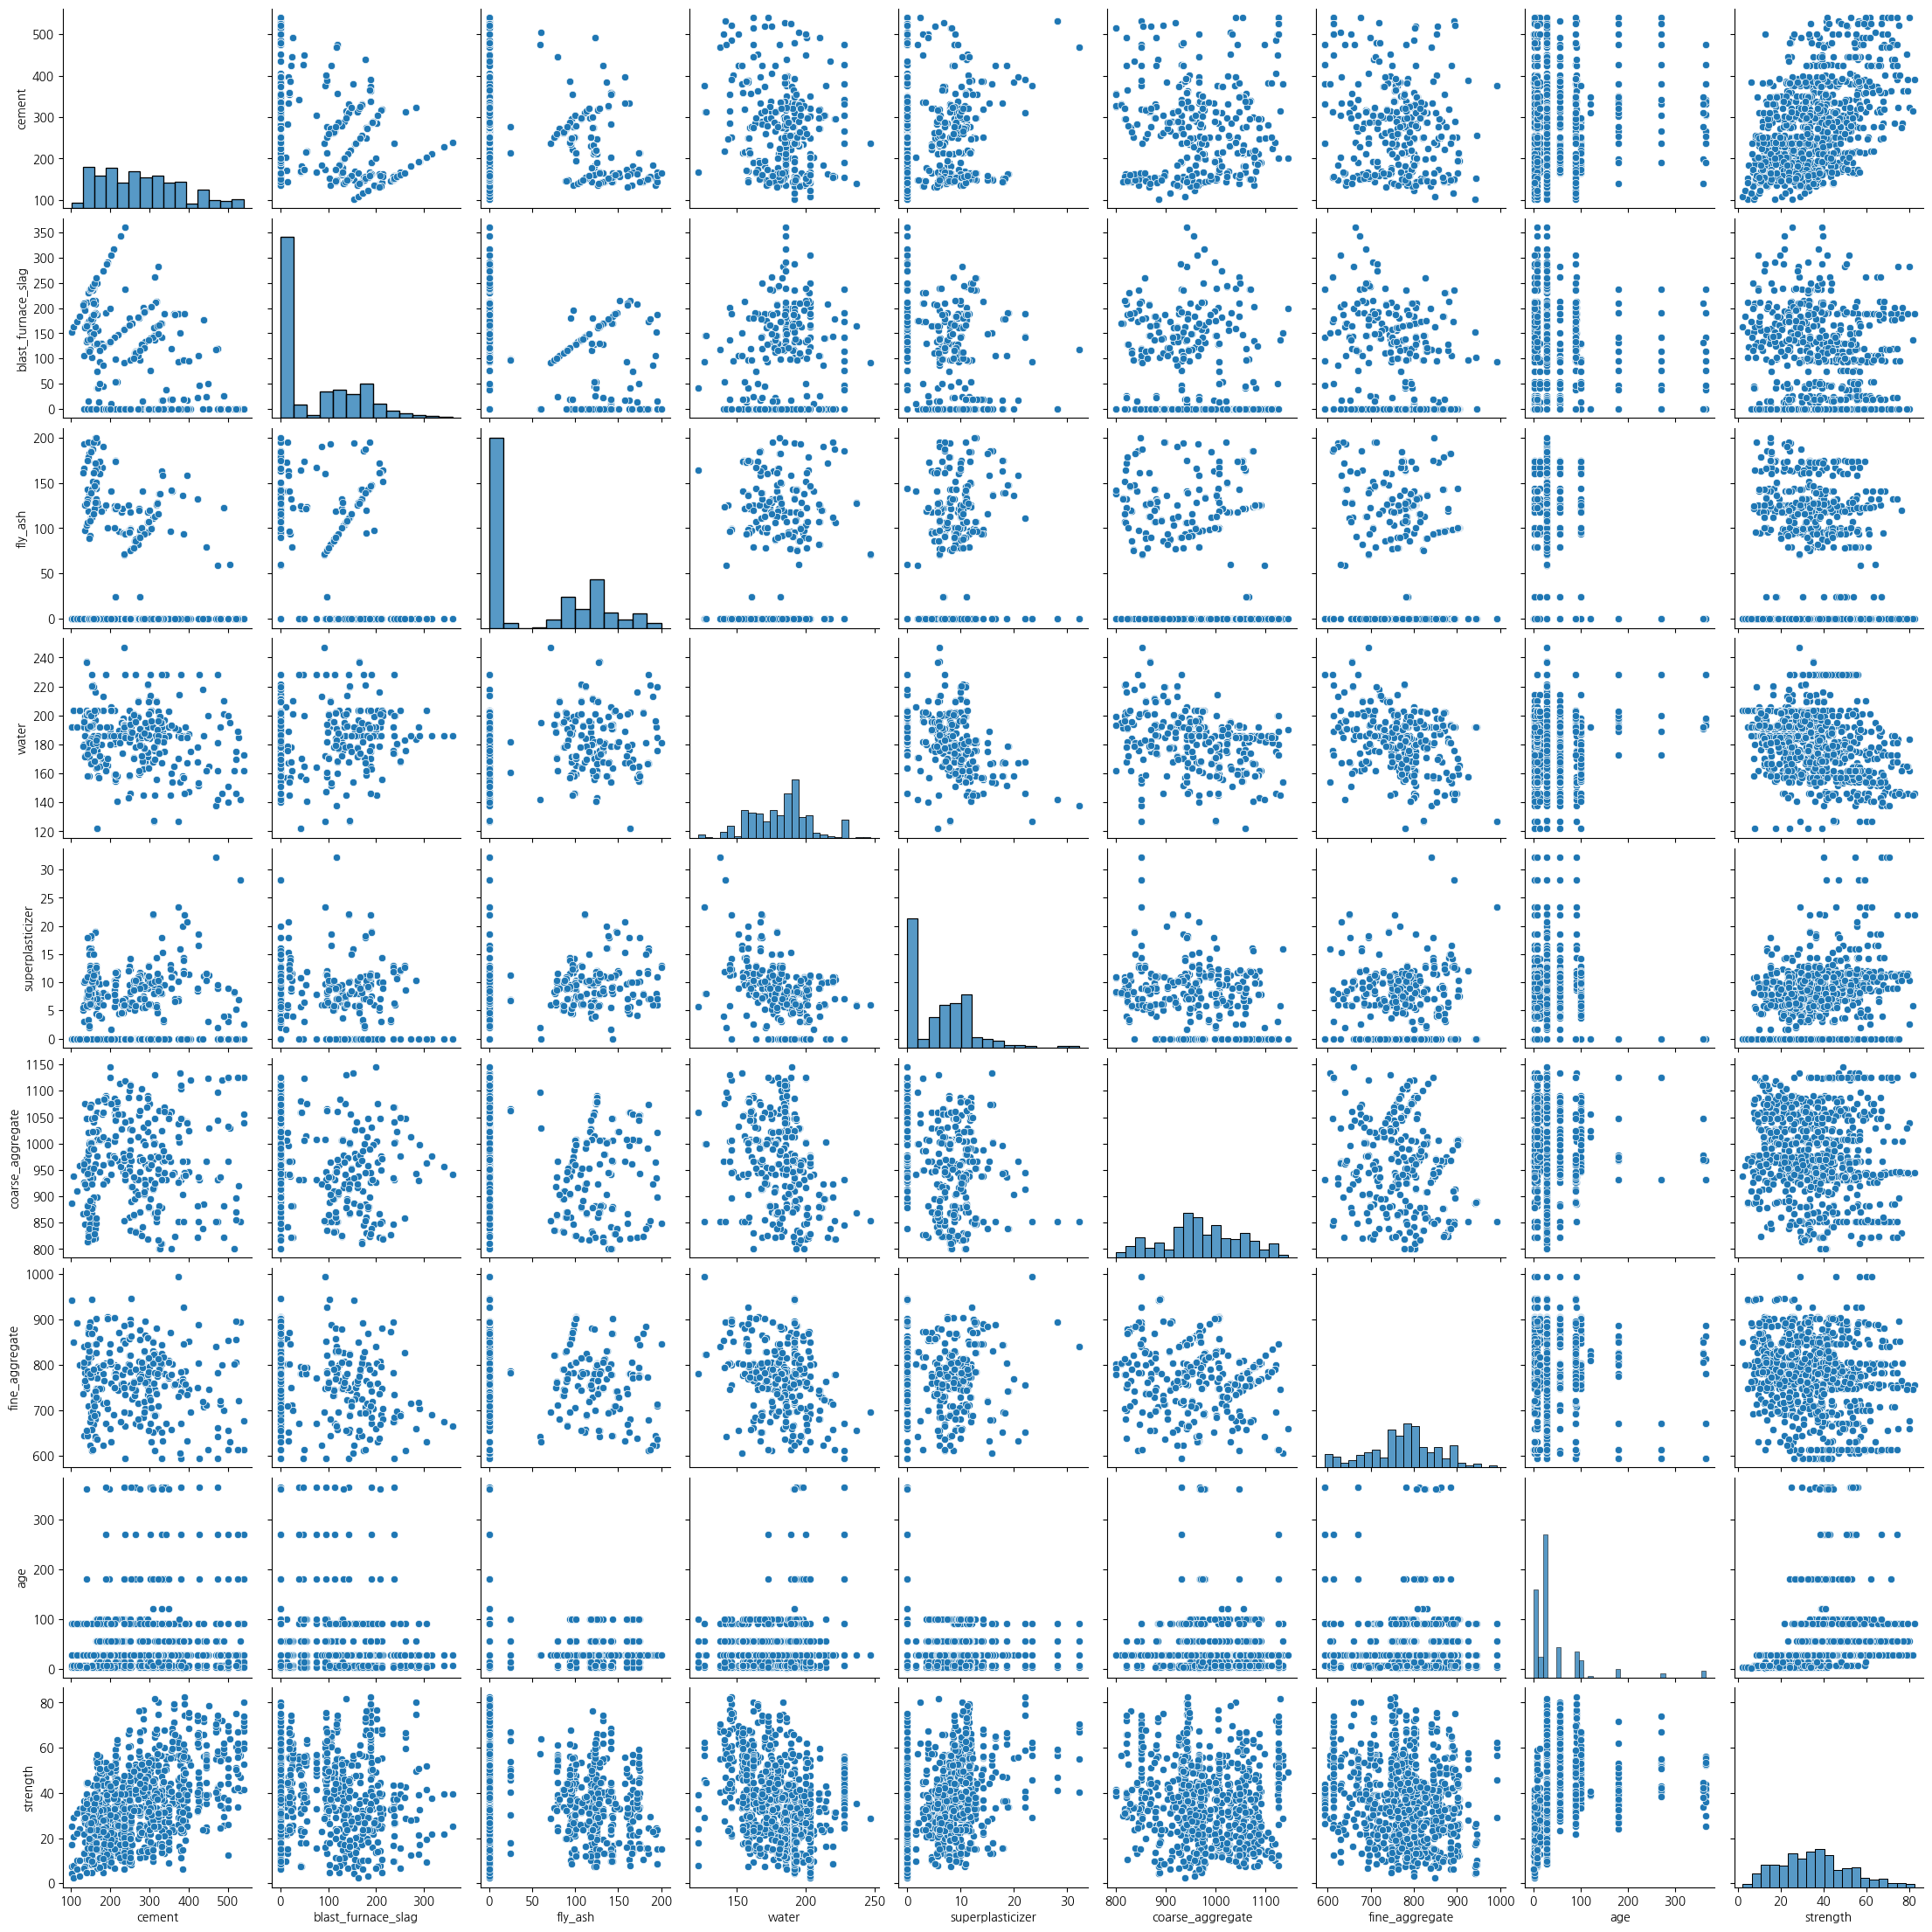

In [6]:
# 그래프로 경향성 확인해보기

# sns.pairplot(df_raw)

In [7]:
# 피어슨 상관계수로 경향성 확인

df_raw.corr(method = "pearson").round(3)

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,strength
cement,1.000,-0.275,-0.397,-0.082,0.092,-0.109,-0.223,0.082,0.498
blast_furnace_slag,-0.275,1.000,-0.324,0.107,0.043,-0.284,-0.282,-0.044,0.135
fly_ash,-0.397,-0.324,1.000,-0.257,0.378,-0.010,0.079,-0.154,-0.106
water,-0.082,0.107,-0.257,1.000,-0.658,-0.182,-0.451,0.278,-0.290
superplasticizer,0.092,0.043,0.378,-0.658,1.000,-0.266,0.223,-0.193,0.366
coarse_aggregate,-0.109,-0.284,-0.010,-0.182,-0.266,1.000,-0.178,-0.003,-0.165
fine_aggregate,-0.223,-0.282,0.079,-0.451,0.223,-0.178,1.000,-0.156,-0.167
age,0.082,-0.044,-0.154,0.278,-0.193,-0.003,-0.156,1.000,0.329
strength,0.498,0.135,-0.106,-0.290,0.366,-0.165,-0.167,0.329,1.000


#### 회귀 모델 생성

In [8]:
# 훈련 데이터와 검정 데이터를 7:3 비율로 분할
df_train, df_test = train_test_split(df_raw, test_size = 0.3, random_state = 7777)
print("train data size : {}".format(df_train.shape))
print("test data size : {}".format(df_test.shape))

train data size : (721, 9)
test data size : (309, 9)


In [9]:
# 선형 회귀 분석

reg_model = smf.ols(formula = "strength ~ cement + blast_furnace_slag + fly_ash  + water + superplasticizer + coarse_aggregate + fine_aggregate + age ", data = df_train)

In [10]:
# 적합

reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:               strength   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.635
Method:                 Least Squares   F-statistic:                     157.5
Date:                Mon, 22 May 2023   Prob (F-statistic):          6.37e-152
Time:                        04:38:53   Log-Likelihood:                -2687.8
No. Observations:                 721   AIC:                             5394.
Df Residuals:                     712   BIC:                             5435.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            -43.4976     29

In [11]:
# 다중공선성 확인

df_train_x = df_train[['cement' , 'blast_furnace_slag' , 'fly_ash' , 'water', 'superplasticizer' ,'coarse_aggregate', 'fine_aggregate', 'age' ]] # y변수 삭제 (x변수 간의 상관성을 확인하기 위함)
df_train_x_const = add_constant(df_train_x) # 상수항 추가

df_vif =pd.DataFrame() # 빈 데이터 프레임 생성
df_vif["variable"] = df_train_x_const.columns  # variable 열에 train_x의 열 제목을 다 담아줌
df_vif["VIF"] = [variance_inflation_factor(df_train_x_const.values, i) for i in range(df_train_x_const.shape[1])] # VIF 열에 다중공선성

df_vif.sort_values("VIF", ascending = True).round(2)  # VIF 정렬

,variable,VIF
8,age,1.09
5,superplasticizer,2.89
6,coarse_aggregate,4.59
3,fly_ash,6.03
7,fine_aggregate,6.32
4,water,6.38
2,blast_furnace_slag,7.04
1,cement,7.26
0,const,6161.09


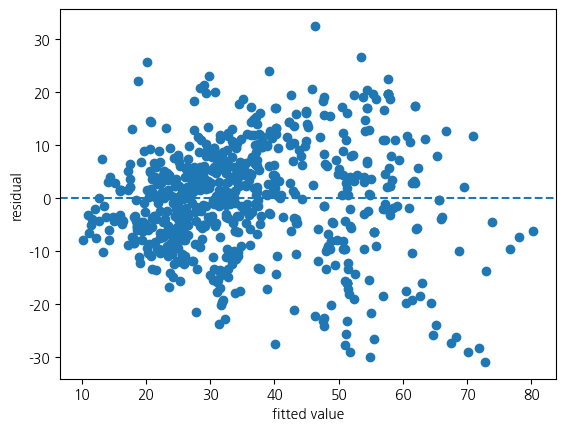

In [12]:
# 등분산성 검정
plt.scatter(reg_result.fittedvalues, reg_result.resid)
plt.xlabel('fitted value')
plt.ylabel('residual')
plt.axhline(y=0 , linestyle = "--")


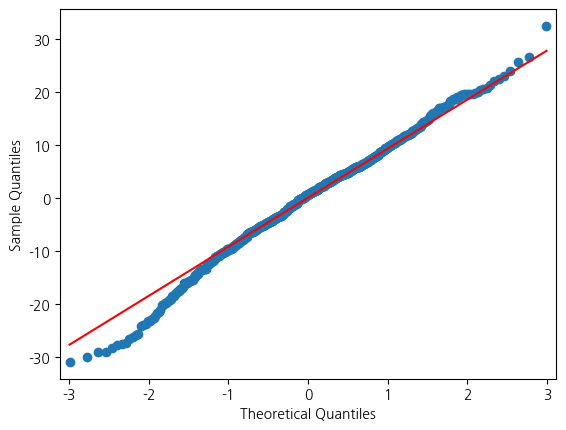

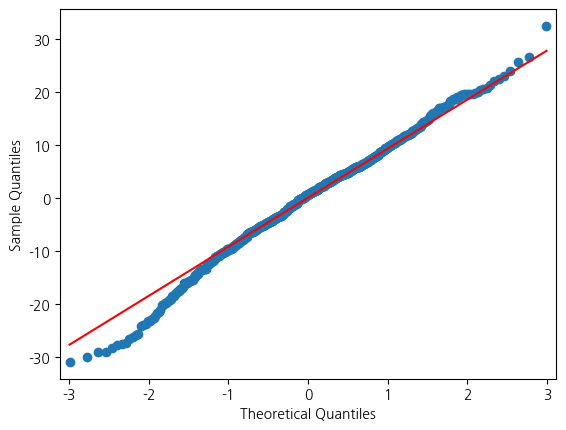

In [13]:
# 정규성 검정
qqplot(reg_result.resid, line = 'q')

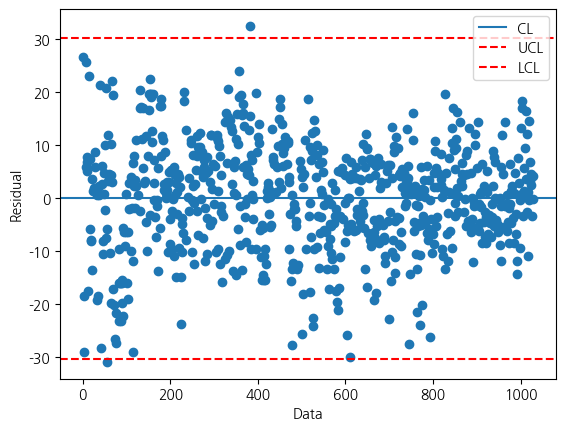

In [14]:
# 잔차의 독립성 확인
plt.scatter(df_train.index, reg_result.resid)
plt.xlabel('Data') ; plt.ylabel('Residual')
plt.axhline(y=0 , linestyle = "-", label = 'CL')
plt.axhline(y=3*np.std(reg_result.resid), linestyle="--", color="red", label="UCL")
plt.axhline(y=-3*np.std(reg_result.resid), linestyle="dashed", color="red", label="LCL")
plt.legend()

In [15]:
# 회귀 모델 생성 
train_pred = reg_result.predict(df_train)
test_pred = reg_result.predict(df_test)
print("train data의 결정계수:", r2_score(df_train['strength'], train_pred))
print("test data의 결정계수:", r2_score(df_test['strength'], test_pred))

train data의 결정계수: 0.6389312910758893
test data의 결정계수: 0.550223332837426


<Axes: >

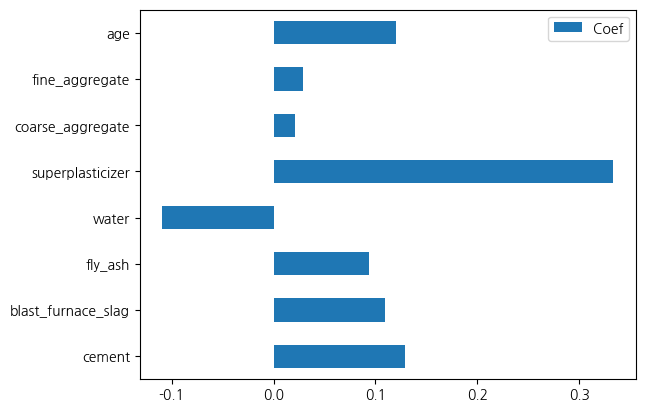

In [16]:
# 설명변수 중요도
df_reg_coef = pd.DataFrame({'Coef' : reg_result.params.values[1:]},
                          index = ['cement' , 'blast_furnace_slag' , 'fly_ash' , 'water', 'superplasticizer' ,'coarse_aggregate', 'fine_aggregate', 'age'])
df_reg_coef.plot.barh(y = 'Coef')

# 로지스틱 회귀분석 (confusion matrix)

In [146]:
# 데이터 불러오기
df_raw = pd.read_csv("/home/piai/바탕화면/실습화일/2. Big Data 분석/HMEQ.csv", encoding = "euc-kr")
df_raw.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1700,30548,40320.0,HomeImp,Other,9.0,0,0.0,101.466002,1.0,8,37.113614
1,1,1800,28502,43034.0,HomeImp,Other,11.0,0,0.0,88.766030,0.0,8,36.884894
2,0,2300,102370,120953.0,HomeImp,Office,2.0,0,0.0,90.992533,0.0,13,31.588503
3,1,2400,34863,47471.0,HomeImp,Mgr,12.0,0,0.0,70.491080,1.0,21,38.263601
4,0,2400,98449,117195.0,HomeImp,Office,4.0,0,0.0,93.811775,0.0,13,29.681827


In [147]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3748 entries, 0 to 3747
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      3748 non-null   int64  
 1   LOAN     3748 non-null   int64  
 2   MORTDUE  3748 non-null   int64  
 3   VALUE    3734 non-null   float64
 4   REASON   3748 non-null   object 
 5   JOB      3667 non-null   object 
 6   YOJ      3543 non-null   float64
 7   DEROG    3748 non-null   int64  
 8   DELINQ   3718 non-null   float64
 9   CLAGE    3711 non-null   float64
 10  NINQ     3692 non-null   float64
 11  CLNO     3748 non-null   int64  
 12  DEBTINC  3748 non-null   float64
dtypes: float64(6), int64(5), object(2)
memory usage: 380.8+ KB


In [148]:
# 결측치 확인
df_raw.isnull().sum(axis = 0)

BAD          0
LOAN         0
MORTDUE      0
VALUE       14
REASON       0
JOB         81
YOJ        205
DEROG        0
DELINQ      30
CLAGE       37
NINQ        56
CLNO         0
DEBTINC      0
dtype: int64

In [149]:
# 결측치 채우기
df_raw["JOB"].fillna("Other", inplace = True)
df_raw.fillna(df_raw.mean(), inplace = True)

In [150]:
# 데이터 분할
df_train, df_test = train_test_split(df_raw,
                                    test_size = 0.3, 
                                    random_state = 1234)
print("train data size : {}".format(df_train.shape))
print("test data size : {}".format(df_test.shape))

train data size : (2623, 13)
test data size : (1125, 13)


In [151]:
# 로지스틱 모델 생성
log_model = Logit.from_formula("""BAD ~ LOAN + MORTDUE + VALUE + C(REASON) + C(JOB) + YOJ + DEROG +
DELINQ + CLAGE + NINQ + CLNO + DEBTINC""", df_train)

log_result = log_model.fit()
print(log_result.summary())

Optimization terminated successfully.
         Current function value: 0.237614
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                    BAD   No. Observations:                 2623
Model:                          Logit   Df Residuals:                     2606
Method:                           MLE   Df Model:                           16
Date:                Mon, 22 May 2023   Pseudo R-squ.:                  0.2257
Time:                        05:21:34   Log-Likelihood:                -623.26
converged:                       True   LL-Null:                       -804.91
Covariance Type:            nonrobust   LLR p-value:                 1.743e-67
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -5.0942      0.560     -9.100      0.000      -6.191      -3.997

In [152]:
# 로지스틱 모델 생성
log_model = Logit.from_formula("""BAD ~ LOAN + MORTDUE + VALUE + C(REASON) + C(JOB) + YOJ + DEROG +
DELINQ + CLAGE + NINQ + CLNO + DEBTINC""", df_train)

log_result = log_model.fit()
print(log_result.summary())

Optimization terminated successfully.
         Current function value: 0.237614
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                    BAD   No. Observations:                 2623
Model:                          Logit   Df Residuals:                     2606
Method:                           MLE   Df Model:                           16
Date:                Mon, 22 May 2023   Pseudo R-squ.:                  0.2257
Time:                        05:21:45   Log-Likelihood:                -623.26
converged:                       True   LL-Null:                       -804.91
Covariance Type:            nonrobust   LLR p-value:                 1.743e-67
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -5.0942      0.560     -9.100      0.000      -6.191      -3.997

In [153]:
# train 데이터 예측
y_pred_train = log_result.predict(df_train)

y_pred_train_class = (y_pred_train > 0.5).astype(int)
print("Train 예측 결과 \n", y_pred_train_class.head(), '\n')
print("Confusion Matrix: \n{}".format(confusion_matrix(df_train["BAD"], y_pred_train_class)), "\n")

# test 데이터 예측
y_pred_test = log_result.predict(df_test)

y_pred_test_class = (y_pred_test > 0.5).astype(int)
print("Test 예측 결과 \n", y_pred_test_class.head(), "\n")
print("Confusion Matrix: \n{}".format(confusion_matrix(df_test["BAD"], y_pred_test_class)), "\n")

Train 예측 결과 
 3164    0
3314    1
93      0
1456    0
3327    0
dtype: int64 

Confusion Matrix: 
[[2365   17]
 [ 190   51]] 

Test 예측 결과 
 1721    0
822     0
1686    0
789     0
165     0
dtype: int64 

Confusion Matrix: 
[[1017    4]
 [  81   23]] 



In [154]:
# 실제 train 데이터와 예측결과 비교
print('Train 예측/분류 결과')
print("Accuracy: {0:.3f}\n".format(accuracy_score(df_train["BAD"], y_pred_train_class)))
print("Confusion Matrix: \n{}".format(confusion_matrix(df_train["BAD"], y_pred_train_class)), "\n")
print(classification_report(df_train["BAD"], y_pred_train_class, digits = 3))
      
# 실제 test 데이터와 예측 결과 비교
print('Test 예측/분류 결과')
print("Accuracy: {0:.3f}\n".format(accuracy_score(df_test["BAD"], y_pred_test_class)))
print("Confusion Matrix: \n{}".format(confusion_matrix(df_test["BAD"], y_pred_test_class)), "\n")
print(classification_report(df_test["BAD"], y_pred_test_class, digits = 3))

Train 예측/분류 결과
Accuracy: 0.921

Confusion Matrix: 
[[2365   17]
 [ 190   51]] 

              precision    recall  f1-score   support

           0      0.926     0.993     0.958      2382
           1      0.750     0.212     0.330       241

    accuracy                          0.921      2623
   macro avg      0.838     0.602     0.644      2623
weighted avg      0.909     0.921     0.900      2623

Test 예측/분류 결과
Accuracy: 0.924

Confusion Matrix: 
[[1017    4]
 [  81   23]] 

              precision    recall  f1-score   support

           0      0.926     0.996     0.960      1021
           1      0.852     0.221     0.351       104

    accuracy                          0.924      1125
   macro avg      0.889     0.609     0.656      1125
weighted avg      0.919     0.924     0.904      1125



<Axes: >

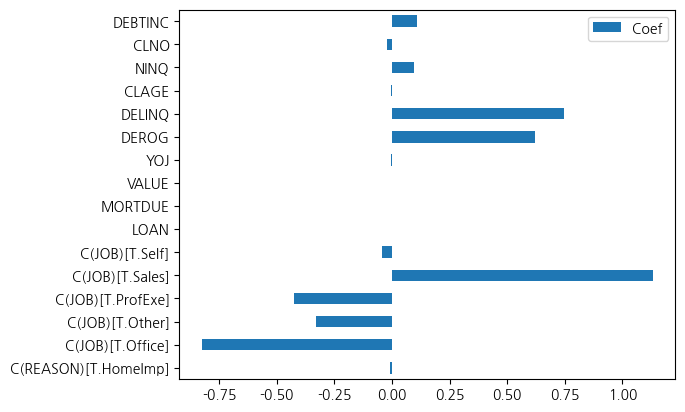

In [155]:
# 최종 회귀식

# 설명변수 중요도
df_logistic_coef = pd.DataFrame({"Coef" : log_result.params.values[1:]}, index = log_model.exog_names[1:])
df_logistic_coef.plot.barh(y = "Coef")

# 의사결정트리

In [39]:
# 데이터 불러오기
df_raw = pd.read_csv("/home/piai/바탕화면/실습화일/2. Big Data 분석/IRIS.csv", encoding = "euc-kr")
df_raw.head()

,SEPAL_LENGTH,SEPAL_WIDTH,PETAL_LENGTH,PETAL_WIDTH,SPECIES
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [40]:
# 결측치 확인
df_raw.isnull().sum(axis = 0)

SEPAL_LENGTH    0
SEPAL_WIDTH     0
PETAL_LENGTH    0
PETAL_WIDTH     0
SPECIES         0
dtype: int64

In [41]:
# 결측치 확인
df_raw.isnull().sum(axis = 0)

SEPAL_LENGTH    0
SEPAL_WIDTH     0
PETAL_LENGTH    0
PETAL_WIDTH     0
SPECIES         0
dtype: int64

In [42]:
# 데이터를 0과 1로 변환
df_raw["SPECIES"] = df_raw["SPECIES"].map({'setosa': 0, 'versicolor': 1, 'virginica': 2})
df_raw.head()

,SEPAL_LENGTH,SEPAL_WIDTH,PETAL_LENGTH,PETAL_WIDTH,SPECIES
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [44]:
# 데이터 구성하기 - 데이터 분할 (7:3)
df_raw_x = df_raw.drop("SPECIES", axis = 1, inplace = False)
df_raw_y = df_raw["SPECIES"]

df_train_x , df_test_x , df_train_y , df_test_y = train_test_split(\
    df_raw_x , df_raw_y, test_size = 0.3 , random_state = 1234)

print("분할 전 설명변수 데이터 : " , df_raw_x.shape)
print("분할 후 설명변수 데이터 : Train" , df_train_x.shape , "Test" , df_test_x.shape)

분할 전 설명변수 데이터 :  (150, 4)
분할 후 설명변수 데이터 : Train (105, 4) Test (45, 4)


In [47]:
# 기본 옵션으로 모델 생성
tree_uncustomized = DecisionTreeClassifier(random_state = 1234)
tree_uncustomized.fit(df_train_x, df_train_y)

print("Accuracy on training set: {:.3f}".format(tree_uncustomized.score(df_train_x, df_train_y)))
print("Accuracy on test set: {:.3f}".format(tree_uncustomized.score(df_test_x, df_test_y)))

Accuracy on training set: 1.000
Accuracy on test set: 0.978


In [48]:
# 현재 생성된 모델의 옵션 확인
print(tree_uncustomized.get_params().keys())
print(tree_uncustomized.get_params().values())

dict_keys(['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'random_state', 'splitter'])
dict_values([0.0, None, 'gini', None, None, None, 0.0, 1, 2, 0.0, 1234, 'best'])


In [49]:
train_accuracy = [] ; test_accuracy = []
para_depth = [depth for depth in range(1,11)]

for v_max_depth in para_depth:
    tree = DecisionTreeClassifier(max_depth = v_max_depth , random_state = 1234)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    test_accuracy.append(tree.score(df_test_x, df_test_y))

df_accuracy_depth = pd.DataFrame()
df_accuracy_depth["Depth"] = para_depth
df_accuracy_depth["TrainAccuracy"] = train_accuracy
df_accuracy_depth["TestAccuracy"] = test_accuracy


In [50]:
# 모델 정확도 확인
df_accuracy_depth.round(3)

,Depth,TrainAccuracy,TestAccuracy
0,1,0.686,0.622
1,2,0.962,0.956
2,3,0.981,0.978
3,4,0.990,0.978
4,5,1.000,0.978
5,6,1.000,0.978
6,7,1.000,0.978
7,8,1.000,0.978
8,9,1.000,0.978
9,10,1.000,0.978


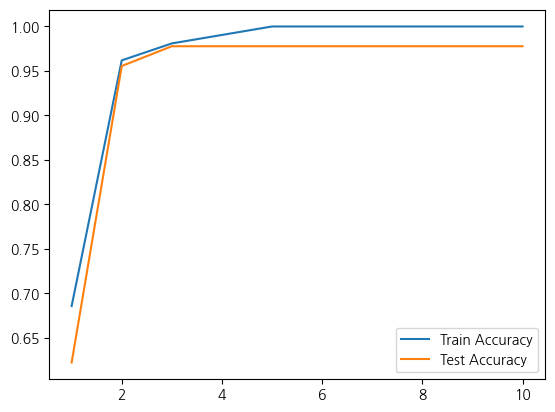

In [51]:
# 그래프 확인
plt.plot(para_depth, train_accuracy, linestyle ="-", label = "Train Accuracy")
plt.plot(para_depth, test_accuracy, linestyle ="-", label = "Test Accuracy")
plt.legend()

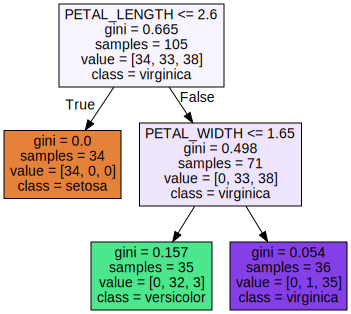

In [62]:
# 최대 깊이가 2인 모델 의사결정나무 확인
v_feature_name = df_train_x.columns
tree_low = DecisionTreeClassifier(max_depth = 2 , random_state = 1234)
tree_low.fit(df_train_x, df_train_y)

export_graphviz(tree_low, out_file = "tree_low.dot" , class_names = ['setosa', 'versicolor', 'virginica'], 
               feature_names = v_feature_name , impurity = True , filled = True)

with open("tree_low.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [53]:
train_accuracy = []; test_accuracy = []
para_split = [n_split * 10 for n_split in range(1,11)]

for v_min_samples_split in para_split:
    tree = DecisionTreeClassifier(min_samples_split = v_min_samples_split , max_depth = 2 , random_state = 1234)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    test_accuracy.append(tree.score(df_test_x, df_test_y))

df_accuracy_split = pd.DataFrame()
df_accuracy_split["MinSamplesSplit"] = para_split
df_accuracy_split["TrainAccuracy"] = train_accuracy
df_accuracy_split["TestAccuracy"] = test_accuracy

In [54]:
# 모델 정확도 확인
df_accuracy_split.round(3)

,MinSamplesSplit,TrainAccuracy,TestAccuracy
0,10,0.962,0.956
1,20,0.962,0.956
2,30,0.962,0.956
3,40,0.962,0.956
4,50,0.962,0.956
5,60,0.962,0.956
6,70,0.962,0.956
7,80,0.686,0.622
8,90,0.686,0.622
9,100,0.686,0.622


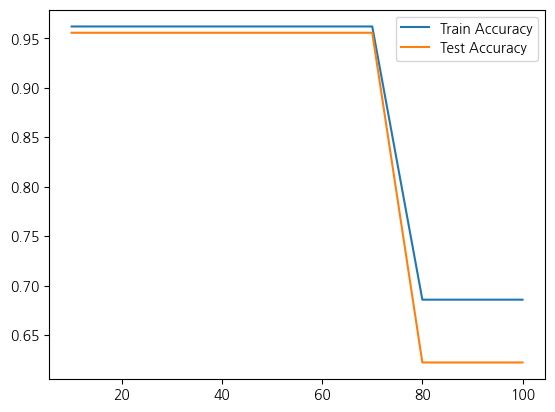

In [55]:
# 그래프 확인
plt.plot(para_split, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_split, test_accuracy, linestyle = "-", label = "Test Accuracy")
plt.legend()

In [56]:
# 분리 노드의 최소 자료수가 40인 모델
tree_low = DecisionTreeClassifier(max_depth = 2 , min_samples_split = 40, random_state = 1234)
tree_low.fit(df_train_x, df_train_y)

DecisionTreeClassifier(max_depth=2, min_samples_split=40, random_state=1234)

In [57]:
train_accuracy = []; test_accuracy = []
para_leaf = [n_leaf * 2 for n_leaf in range(1,11)]

for v_min_samples_leaf in para_leaf:
    tree = DecisionTreeClassifier(min_samples_leaf = v_min_samples_leaf , min_samples_split = 40, max_depth = 2 , random_state = 1234)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    test_accuracy.append(tree.score(df_test_x, df_test_y))

df_accuracy_leaf = pd.DataFrame()
df_accuracy_leaf["MinSamplesLeaf"] = para_leaf
df_accuracy_leaf["TrainAccuracy"] = train_accuracy
df_accuracy_leaf["TestAccuracy"] = test_accuracy

In [58]:
# 모델 정확도 확인
df_accuracy_leaf.round(3)

,MinSamplesLeaf,TrainAccuracy,TestAccuracy
0,2,0.962,0.956
1,4,0.962,0.956
2,6,0.962,0.956
3,8,0.962,0.956
4,10,0.962,0.956
5,12,0.962,0.956
6,14,0.962,0.956
7,16,0.962,0.956
8,18,0.962,0.956
9,20,0.962,0.956


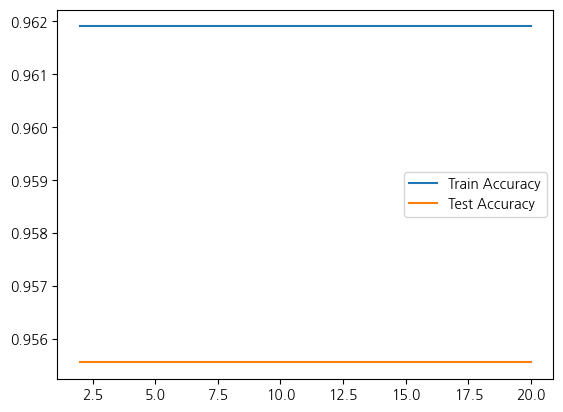

In [59]:
# 그래프 확인
plt.plot(para_leaf, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_leaf, test_accuracy, linestyle = "-", label = "Test Accuracy")
plt.legend()

In [60]:
# 잎사귀 노드의 최소 자료수가 8인 모델
tree_low = DecisionTreeClassifier(max_depth = 2 , min_samples_split = 40, min_samples_leaf = 8,random_state = 1234)
tree_low.fit(df_train_x, df_train_y)

DecisionTreeClassifier(max_depth=2, min_samples_leaf=8, min_samples_split=40,
                       random_state=1234)

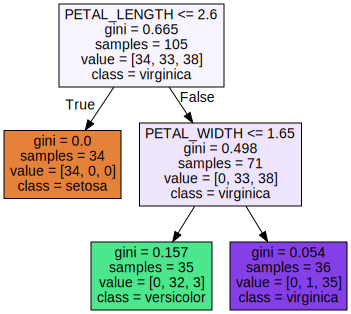

In [63]:
# 잎사귀 노드의 최소 자료수가 8인 모델
export_graphviz(tree_low, out_file = "tree_low.dot" , class_names = ['setosa', 'versicolor', 'virginica'], 
               feature_names = v_feature_name, impurity = True, filled = True)

with open("tree_low.dot") as f :
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [64]:
# 최종 모델 
tree_final = DecisionTreeClassifier(max_depth = 2 , min_samples_split = 40, min_samples_leaf = 8,random_state = 1234)
tree_final.fit(df_train_x, df_train_y)

DecisionTreeClassifier(max_depth=2, min_samples_leaf=8, min_samples_split=40,
                       random_state=1234)

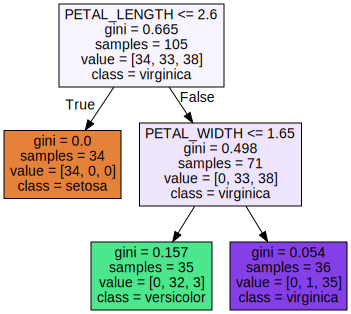

In [65]:
# tree_final.dot으로 결과 저장
export_graphviz(tree_final, out_file = "tree_final.dot" , class_names = ['setosa', 'versicolor', 'virginica'], 
               feature_names = v_feature_name, impurity = True, filled = True)
# tree_final.dot 그리기
with open("tree_final.dot") as f :
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [66]:
# 평가
y_pred = tree_final.predict(df_test_x)
print("Accuracy: {0:.3f}\n".format(tree_final.score(df_test_x, df_test_y)))
print("Confusion matrix:\n {}\n".format(confusion_matrix(df_test_y, y_pred)))

Accuracy: 0.956

Confusion matrix:
 [[16  0  0]
 [ 0 16  1]
 [ 0  1 11]]



In [67]:
# 목표변수의 빈도 불균형 : f1 score로 모델 평가
print(classification_report(df_test_y, y_pred, digits = 3))

              precision    recall  f1-score   support

           0      1.000     1.000     1.000        16
           1      0.941     0.941     0.941        17
           2      0.917     0.917     0.917        12

    accuracy                          0.956        45
   macro avg      0.953     0.953     0.953        45
weighted avg      0.956     0.956     0.956        45



In [68]:
# tree.feature_importances_로 설명변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = tree_final.feature_importances_

# df_feature_importance의 테이블을 중요도 순으로 정렬
df_importance.sort_values("Importance", ascending = False , inplace = True)
df_importance.round(3)

,Feature,Importance
2,PETAL_LENGTH,0.553
3,PETAL_WIDTH,0.447
0,SEPAL_LENGTH,0.000
1,SEPAL_WIDTH,0.000


Text(0, 0.5, '설명변수')

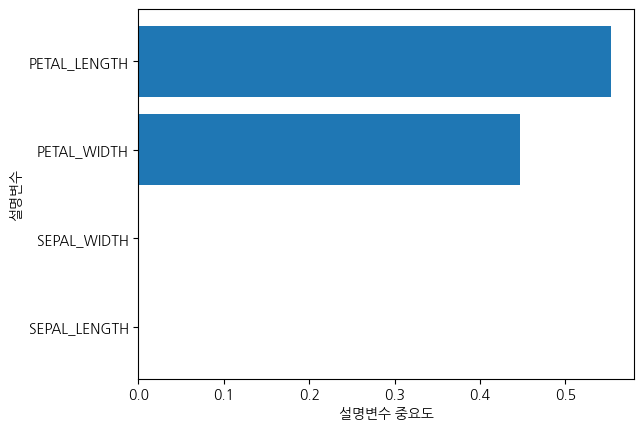

In [69]:
# 설명변수 중요도 그래프
# 중요도가 높은 변수를 상위에 그림
df_importance.sort_values("Importance", ascending = True , inplace = True)
coordinates = range(len(df_importance))
plt.barh( y = coordinates, width = df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("설명변수 중요도")
plt.ylabel("설명변수")

# 4. KNN

In [70]:
# 데이터 불러오기
df_raw = pd.read_csv("/home/piai/바탕화면/실습화일/2. Big Data 분석/유방암.csv", encoding = "euc-kr")
df_raw.head()

,diagnosis,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,음성,15.12,16.68,98.78,716.6,0.08876,0.09588,0.07550,0.04079,0.1594,...,17.77,20.24,117.70,989.5,0.14910,0.3331,0.3327,0.12520,0.3415,0.09740
1,양성,10.80,9.71,68.77,357.6,0.09594,0.05736,0.02531,0.01698,0.1381,...,11.60,12.02,73.66,414.0,0.14360,0.1257,0.1047,0.04603,0.2090,0.07699
2,음성,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,...,21.31,26.36,139.20,1410.0,0.12340,0.2445,0.3538,0.15710,0.3206,0.06938
3,양성,14.92,14.93,96.45,686.9,0.08098,0.08549,0.05539,0.03221,0.1687,...,17.18,18.22,112.00,906.6,0.10650,0.2791,0.3151,0.11470,0.2688,0.08273
4,양성,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,0.1337,...,13.62,15.54,87.40,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915


In [71]:
# 결측치 확인
df_raw.isnull().sum(axis = 0)

diagnosis                  0
mean_radius                0
mean_texture               0
mean_perimeter             0
mean_area                  0
mean_smoothness            0
mean_compactness           0
mean_concavity             0
mean_concave_points        0
mean_symmetry              0
mean_fractal_dimension     0
radius_error               0
texture_error              0
perimeter_error            0
area_error                 0
smoothness_error           0
compactness_error          0
concavity_error            0
concave_points_error       0
symmetry_error             0
fractal_dimension_error    0
worst_radius               0
worst_texture              0
worst_perimeter            0
worst_area                 0
worst_smoothness           0
worst_compactness          0
worst_concavity            0
worst_concave_points       0
worst_symmetry             0
worst_fractal_dimension    0
dtype: int64

In [72]:
# diagnosis 데이터를 0과 1로 변환
df_raw["diagnosis"] = df_raw["diagnosis"].map({"음성": 0, "양성": 1})
df_raw.head()

,diagnosis,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,0,15.12,16.68,98.78,716.6,0.08876,0.09588,0.07550,0.04079,0.1594,...,17.77,20.24,117.70,989.5,0.14910,0.3331,0.3327,0.12520,0.3415,0.09740
1,1,10.80,9.71,68.77,357.6,0.09594,0.05736,0.02531,0.01698,0.1381,...,11.60,12.02,73.66,414.0,0.14360,0.1257,0.1047,0.04603,0.2090,0.07699
2,0,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,...,21.31,26.36,139.20,1410.0,0.12340,0.2445,0.3538,0.15710,0.3206,0.06938
3,1,14.92,14.93,96.45,686.9,0.08098,0.08549,0.05539,0.03221,0.1687,...,17.18,18.22,112.00,906.6,0.10650,0.2791,0.3151,0.11470,0.2688,0.08273
4,1,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,0.1337,...,13.62,15.54,87.40,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915


In [73]:
# 데이터 구성하기 - 데이터 분할 (7:3)
df_raw_x = df_raw.drop("diagnosis", axis = 1, inplace = False)
df_raw_y = df_raw["diagnosis"]

df_train_x , df_test_x , df_train_y , df_test_y = train_test_split(\
    df_raw_x , df_raw_y, test_size = 0.3 , random_state = 1234)

print("분할 전 설명변수 데이터 : " , df_raw_x.shape)
print("분할 후 설명변수 데이터 : Train" , df_train_x.shape , "Test" , df_test_x.shape)

분할 전 설명변수 데이터 :  (320, 30)
분할 후 설명변수 데이터 : Train (224, 30) Test (96, 30)


In [76]:
# 기본 옵션으로 모델생성
knn_uncutomized = KNeighborsClassifier()
knn_uncutomized.fit(df_train_x, df_train_y)

print("Accuracy on training set:{:.3f}".format(knn_uncutomized.score(df_train_x, df_train_y)))
print("Accuracy on test set:{:.3f}".format(knn_uncutomized.score(df_test_x, df_test_y)))

Accuracy on training set:0.942
Accuracy on test set:0.906


In [77]:
# 현재 생성된 모델의 옵션 확인
print(knn_uncutomized.get_params().keys())
print(knn_uncutomized.get_params().values())

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])
dict_values(['auto', 30, 'minkowski', None, None, 5, 2, 'uniform'])


In [78]:
# n_estimators : 트리 수 변경에 따른 모델 성능
train_accuracy = []; test_accuracy = []
para_n_neighbors = [i for i in range(1,16)]

for v_n_neighbors in para_n_neighbors:
    knn = KNeighborsClassifier(n_neighbors = v_n_neighbors)
    knn.fit(df_train_x, df_train_y)
    train_accuracy.append(knn.score(df_train_x, df_train_y))
    test_accuracy.append(knn.score(df_test_x, df_test_y))

df_accuracy_neighbors = pd.DataFrame()
df_accuracy_neighbors["Neighbors"] = para_n_neighbors
df_accuracy_neighbors["TrainAccuracy"] = train_accuracy
df_accuracy_neighbors["TestAccuracy"] = test_accuracy
df_accuracy_neighbors.round(3)

,Neighbors,TrainAccuracy,TestAccuracy
0,1,1.000,0.865
1,2,0.942,0.906
2,3,0.933,0.885
3,4,0.929,0.896
4,5,0.942,0.906
5,6,0.946,0.927
6,7,0.938,0.917
7,8,0.933,0.917
8,9,0.929,0.917
9,10,0.911,0.896


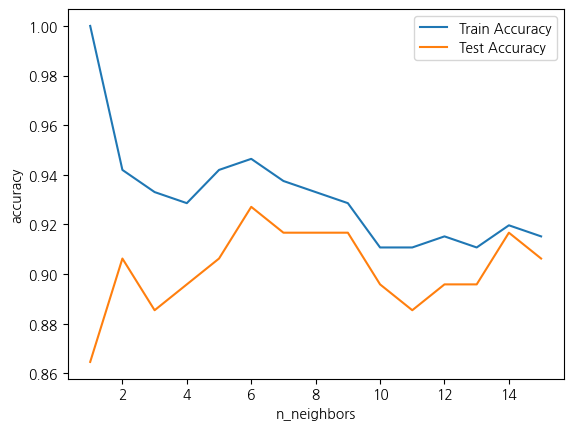

In [79]:
# 모델 정확도 그래프 확인
plt.plot(para_n_neighbors, train_accuracy, linestyle = "-" , label = "Train Accuracy")
plt.plot(para_n_neighbors, test_accuracy, linestyle = "-" , label = "Test Accuracy")
plt.ylabel("accuracy"); plt.xlabel("n_neighbors")
plt.legend()

In [80]:
n_neighbors = 6

In [81]:
train_accuracy = []; test_accuracy = []

para_n_neighbors = [i for i in range(1,11)] * 2

para_weights = (["uniform"]) * 10 + (["distance"] * 10) 

for (v_n_neighbors, v_weights) in zip(para_n_neighbors, para_weights):
    knn = KNeighborsClassifier(n_neighbors = v_n_neighbors , weights = v_weights)
    knn.fit(df_train_x, df_train_y)
    train_accuracy.append(knn.score(df_train_x, df_train_y))
    test_accuracy.append(knn.score(df_test_x, df_test_y))

df_accuracy_weights = pd.DataFrame()
df_accuracy_weights["Neighbors"] = para_n_neighbors
df_accuracy_weights["Weights"] = para_weights
df_accuracy_weights["TrainAccuracy"] = train_accuracy
df_accuracy_weights["TestAccuracy"] = test_accuracy
df_accuracy_weights.round(3)

,Neighbors,Weights,TrainAccuracy,TestAccuracy
0,1,uniform,1.000,0.865
1,2,uniform,0.942,0.906
2,3,uniform,0.933,0.885
3,4,uniform,0.929,0.896
4,5,uniform,0.942,0.906
5,6,uniform,0.946,0.927
6,7,uniform,0.938,0.917
7,8,uniform,0.933,0.917
8,9,uniform,0.929,0.917
9,10,uniform,0.911,0.896


In [82]:
df_accuracy_weights_pivot = df_accuracy_weights.pivot(index = "Neighbors" , columns = "Weights" ,
                                                     values = ["TrainAccuracy", "TestAccuracy"])
df_accuracy_weights_pivot

TrainAccuracy           TestAccuracy          
Weights        distance   uniform     distance   uniform
Neighbors                                               
1                   1.0  1.000000     0.864583  0.864583
2                   1.0  0.941964     0.864583  0.906250
3                   1.0  0.933036     0.885417  0.885417
4                   1.0  0.928571     0.864583  0.895833
5                   1.0  0.941964     0.895833  0.906250
6                   1.0  0.946429     0.895833  0.927083
7                   1.0  0.937500     0.906250  0.916667
8                   1.0  0.933036     0.906250  0.916667
9                   1.0  0.928571     0.916667  0.916667
10                  1.0  0.910714     0.895833  0.895833

In [83]:
level0 =df_accuracy_weights_pivot.columns.get_level_values(0)
level1 =df_accuracy_weights_pivot.columns.get_level_values(1)
df_accuracy_weights_pivot.columns = level0 + "_" + level1
df_accuracy_weights_pivot.head()

,TrainAccuracy_distance,TrainAccuracy_uniform,TestAccuracy_distance,TestAccuracy_uniform
Neighbors,,,,
1,1.0,1.000000,0.864583,0.864583
2,1.0,0.941964,0.864583,0.906250
3,1.0,0.933036,0.885417,0.885417
4,1.0,0.928571,0.864583,0.895833
5,1.0,0.941964,0.895833,0.906250


<Axes: xlabel='Neighbors'>

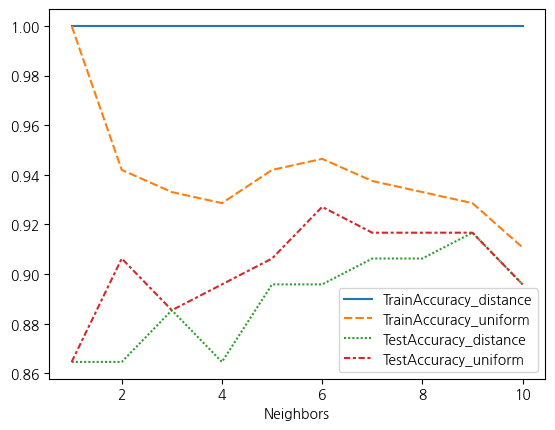

In [84]:
sns.lineplot(data = df_accuracy_weights_pivot)

In [85]:
weights = "uniform"

In [86]:
train_accuracy = []; test_accuracy = []

para_n_neighbors = [i for i in range(1,11)] * 2

para_metric = (["euclidean"]) * 10 + (["manhattan"] * 10) 

for (v_n_neighbors, v_metric) in zip(para_n_neighbors, para_metric):
    knn = KNeighborsClassifier(n_neighbors = v_n_neighbors , metric = v_metric , weights = "uniform")
    knn.fit(df_train_x, df_train_y)
    train_accuracy.append(knn.score(df_train_x, df_train_y))
    test_accuracy.append(knn.score(df_test_x, df_test_y))

df_accuracy_metric = pd.DataFrame()
df_accuracy_metric["Neighbors"] = para_n_neighbors
df_accuracy_metric["Metric"] = para_metric
df_accuracy_metric["TrainAccuracy"] = train_accuracy
df_accuracy_metric["TestAccuracy"] = test_accuracy
df_accuracy_metric.round(3)

,Neighbors,Metric,TrainAccuracy,TestAccuracy
0,1,euclidean,1.000,0.865
1,2,euclidean,0.942,0.906
2,3,euclidean,0.933,0.885
3,4,euclidean,0.929,0.896
4,5,euclidean,0.942,0.906
5,6,euclidean,0.946,0.927
6,7,euclidean,0.938,0.917
7,8,euclidean,0.933,0.917
8,9,euclidean,0.929,0.917
9,10,euclidean,0.911,0.896


In [87]:
df_accuracy_metric_pivot = df_accuracy_metric.pivot(index = "Neighbors" , columns = "Metric" ,
                                                     values = ["TrainAccuracy", "TestAccuracy"])

level0 =df_accuracy_metric_pivot.columns.get_level_values(0)
level1 =df_accuracy_metric_pivot.columns.get_level_values(1)
df_accuracy_metric_pivot.columns = level0 + "_" + level1
df_accuracy_metric_pivot.head()

,TrainAccuracy_euclidean,TrainAccuracy_manhattan,TestAccuracy_euclidean,TestAccuracy_manhattan
Neighbors,,,,
1,1.000000,1.000000,0.864583,0.875000
2,0.941964,0.955357,0.906250,0.947917
3,0.933036,0.933036,0.885417,0.916667
4,0.928571,0.928571,0.895833,0.906250
5,0.941964,0.941964,0.906250,0.927083


<Axes: xlabel='Neighbors'>

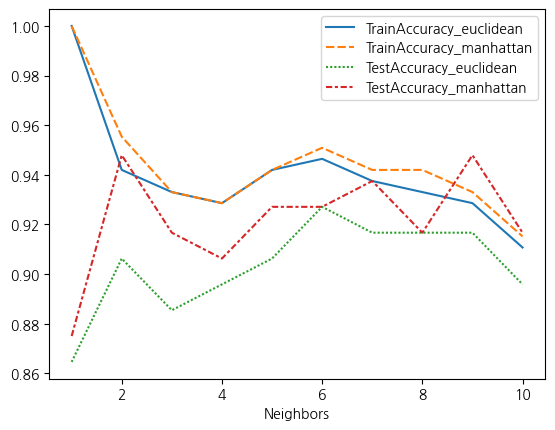

In [88]:
sns.lineplot(data = df_accuracy_metric_pivot)

In [89]:
para_metric = "euclidean"

In [90]:
# 최종 모델
knn_model = KNeighborsClassifier(n_neighbors = 6 , weights = "uniform", metric = "euclidean")
knn_model.fit(df_train_x, df_train_y)
y_pred = knn_model.predict(df_test_x)

print("train data accuracy: {0:.3f}".format(knn_model.score(df_train_x, df_train_y)))
print("test data accuracy: {0:.3f}".format(knn_model.score(df_test_x, df_test_y)))
print("Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))
print(classification_report(df_test_y, y_pred, digits = 3))

train data accuracy: 0.946
test data accuracy: 0.927
Confusion matrix: 
[[68  4]
 [ 3 21]]
              precision    recall  f1-score   support

           0      0.958     0.944     0.951        72
           1      0.840     0.875     0.857        24

    accuracy                          0.927        96
   macro avg      0.899     0.910     0.904        96
weighted avg      0.928     0.927     0.928        96



# PCA

In [91]:
# 데이터 불러오기
df_raw = pd.read_csv("/home/piai/바탕화면/실습화일/2. Big Data 분석/유방암.csv", encoding = "euc-kr")
df_raw.head()

,diagnosis,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,음성,15.12,16.68,98.78,716.6,0.08876,0.09588,0.07550,0.04079,0.1594,...,17.77,20.24,117.70,989.5,0.14910,0.3331,0.3327,0.12520,0.3415,0.09740
1,양성,10.80,9.71,68.77,357.6,0.09594,0.05736,0.02531,0.01698,0.1381,...,11.60,12.02,73.66,414.0,0.14360,0.1257,0.1047,0.04603,0.2090,0.07699
2,음성,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,...,21.31,26.36,139.20,1410.0,0.12340,0.2445,0.3538,0.15710,0.3206,0.06938
3,양성,14.92,14.93,96.45,686.9,0.08098,0.08549,0.05539,0.03221,0.1687,...,17.18,18.22,112.00,906.6,0.10650,0.2791,0.3151,0.11470,0.2688,0.08273
4,양성,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,0.1337,...,13.62,15.54,87.40,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915


In [92]:
df_raw

,diagnosis,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,음성,15.12,16.68,98.78,716.6,0.08876,0.09588,0.07550,0.04079,0.1594,...,17.77,20.24,117.70,989.5,0.14910,0.33310,0.33270,0.12520,0.3415,0.09740
1,양성,10.80,9.71,68.77,357.6,0.09594,0.05736,0.02531,0.01698,0.1381,...,11.60,12.02,73.66,414.0,0.14360,0.12570,0.10470,0.04603,0.2090,0.07699
2,음성,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,...,21.31,26.36,139.20,1410.0,0.12340,0.24450,0.35380,0.15710,0.3206,0.06938
3,양성,14.92,14.93,96.45,686.9,0.08098,0.08549,0.05539,0.03221,0.1687,...,17.18,18.22,112.00,906.6,0.10650,0.27910,0.31510,0.11470,0.2688,0.08273
4,양성,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,0.1337,...,13.62,15.54,87.40,577.0,0.09616,0.11470,0.11860,0.05366,0.2309,0.06915
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,음성,19.55,23.21,128.90,1174.0,0.10100,0.13180,0.18560,0.10210,0.1989,...,20.82,30.44,142.00,1313.0,0.12510,0.24140,0.38290,0.18250,0.2576,0.07602
316,음성,19.10,26.29,129.10,1132.0,0.12150,0.17910,0.19370,0.14690,0.1634,...,20.33,32.72,141.30,1298.0,0.13920,0.28170,0.24320,0.18410,0.2311,0.09203
317,음성,24.25,20.20,166.20,1761.0,0.14470,0.28670,0.42680,0.20120,0.2655,...,26.02,23.99,180.90,2073.0,0.16960,0.42440,0.58030,0.22480,0.3222,0.08009
318,음성,19.17,24.80,132.40,1123.0,0.09740,0.24580,0.20650,0.11180,0.2397,...,20.96,29.94,151.70,1332.0,0.10370,0.39030,0.36390,0.17670,0.3176,0.10230


In [93]:
# 데이터 분리
df_raw_x = df_raw.drop('diagnosis', axis = 1)
df_raw_y = df_raw['diagnosis']

# 종속변수 확인
df_raw_y.head()

0    음성
1    양성
2    음성
3    양성
4    양성
Name: diagnosis, dtype: object

In [94]:
# 독립변수 확인
df_raw_x.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,15.12,16.68,98.78,716.6,0.08876,0.09588,0.07550,0.04079,0.1594,0.05986,...,17.77,20.24,117.70,989.5,0.14910,0.3331,0.3327,0.12520,0.3415,0.09740
1,10.80,9.71,68.77,357.6,0.09594,0.05736,0.02531,0.01698,0.1381,0.06400,...,11.60,12.02,73.66,414.0,0.14360,0.1257,0.1047,0.04603,0.2090,0.07699
2,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,0.05425,...,21.31,26.36,139.20,1410.0,0.12340,0.2445,0.3538,0.15710,0.3206,0.06938
3,14.92,14.93,96.45,686.9,0.08098,0.08549,0.05539,0.03221,0.1687,0.05669,...,17.18,18.22,112.00,906.6,0.10650,0.2791,0.3151,0.11470,0.2688,0.08273
4,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,0.1337,0.05581,...,13.62,15.54,87.40,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915


In [95]:
# Pearson 상관계수
df_raw_x.corr().round(3)

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
mean_radius,1.000,0.329,0.997,0.988,0.148,0.454,0.675,0.811,0.140,-0.307,...,0.959,0.272,0.955,0.931,0.071,0.297,0.470,0.697,0.076,-0.059
mean_texture,0.329,1.000,0.336,0.317,0.002,0.253,0.309,0.297,0.050,-0.051,...,0.362,0.901,0.370,0.343,0.130,0.299,0.332,0.312,0.095,0.152
mean_perimeter,0.997,0.336,1.000,0.986,0.191,0.513,0.721,0.844,0.184,-0.249,...,0.958,0.279,0.960,0.930,0.106,0.346,0.513,0.728,0.105,-0.011
mean_area,0.988,0.317,0.986,1.000,0.146,0.436,0.672,0.802,0.124,-0.294,...,0.949,0.250,0.946,0.946,0.061,0.268,0.444,0.665,0.042,-0.076
mean_smoothness,0.148,0.002,0.191,0.146,1.000,0.678,0.592,0.578,0.584,0.643,...,0.186,0.069,0.220,0.169,0.800,0.504,0.503,0.535,0.380,0.531
mean_compactness,0.454,0.253,0.513,0.436,0.678,1.000,0.890,0.812,0.670,0.625,...,0.479,0.264,0.546,0.441,0.569,0.851,0.826,0.802,0.511,0.681
mean_concavity,0.675,0.309,0.721,0.672,0.592,0.890,1.000,0.935,0.544,0.360,...,0.670,0.292,0.721,0.644,0.473,0.708,0.854,0.848,0.373,0.465
mean_concave_points,0.811,0.297,0.844,0.802,0.578,0.812,0.935,1.000,0.498,0.197,...,0.806,0.283,0.839,0.774,0.436,0.597,0.731,0.891,0.329,0.321
mean_symmetry,0.140,0.050,0.184,0.124,0.584,0.670,0.544,0.498,1.000,0.540,...,0.170,0.101,0.216,0.141,0.445,0.541,0.493,0.486,0.722,0.488
mean_fractal_dimension,-0.307,-0.051,-0.249,-0.294,0.643,0.625,0.360,0.197,0.540,1.000,...,-0.249,0.006,-0.190,-0.246,0.553,0.554,0.411,0.236,0.407,0.782


In [96]:
# 요약통계량 -> scale 변환 필요 확인
df_raw_x.describe().round(3)

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
count,320.000,320.000,320.000,320.000,320.000,320.000,320.000,320.000,320.000,320.000,...,320.000,320.000,320.000,320.000,320.000,320.000,320.000,320.000,320.000,320.000
mean,15.710,20.323,103.050,807.736,0.099,0.123,0.122,0.067,0.187,0.063,...,18.542,27.226,123.222,1133.463,0.138,0.309,0.353,0.145,0.305,0.087
std,3.746,4.151,25.836,391.969,0.014,0.057,0.085,0.042,0.027,0.007,...,5.182,6.050,35.960,640.980,0.023,0.175,0.214,0.067,0.069,0.020
min,7.691,9.710,47.920,170.400,0.053,0.027,0.000,0.000,0.127,0.050,...,8.678,12.020,54.490,223.600,0.086,0.050,0.000,0.000,0.156,0.055
25%,13.050,17.460,84.845,523.900,0.090,0.081,0.053,0.030,0.167,0.057,...,14.657,23.275,95.525,653.525,0.123,0.180,0.183,0.091,0.259,0.073
50%,15.125,20.215,100.100,713.050,0.099,0.115,0.111,0.065,0.185,0.061,...,17.730,26.880,118.850,969.200,0.138,0.277,0.340,0.153,0.296,0.083
75%,18.520,22.500,121.550,1075.250,0.108,0.156,0.170,0.092,0.203,0.067,...,22.420,30.938,148.850,1538.500,0.151,0.406,0.484,0.197,0.328,0.098
max,28.110,39.280,188.500,2501.000,0.163,0.345,0.427,0.201,0.304,0.097,...,36.040,49.540,251.200,4254.000,0.223,1.058,1.170,0.291,0.664,0.208


In [97]:
# 변수 이름 저장
x_cols = df_raw_x.columns
# Scale 변환 : ndarray 형식
scaler = StandardScaler()
nd_scaled = scaler.fit_transform(df_raw_x)
# 변환된 데이터 및 형태 확인
print("Scaled Data :\n {}".format(nd_scaled[:5].round(3)))
print("Shape : \n{}".format(nd_scaled.shape))

Scaled Data :
 [[-0.158 -0.879 -0.166 -0.233 -0.745 -0.479 -0.551 -0.628 -0.997 -0.393
  -0.693 -1.741 -0.65  -0.516 -0.499 -0.513 -0.671 -0.865 -0.592 -0.457
  -0.149 -1.156 -0.154 -0.225  0.491  0.139 -0.094 -0.302  0.526  0.511]
 [-1.313 -2.561 -1.329 -1.15  -0.24  -1.154 -1.143 -1.2   -1.774  0.184
  -0.995 -1.649 -1.003 -0.784  0.325 -1.023 -1.067 -1.361 -0.892 -0.801
  -1.342 -2.517 -1.38  -1.124  0.254 -1.046 -1.159 -1.48  -1.388 -0.507]
 [ 0.695 -0.421  0.603  0.596 -0.947 -0.675 -0.478 -0.212 -0.899 -1.174
  -0.734 -1.505 -0.715 -0.471 -1.419 -1.058 -0.936 -1.127 -1.099 -1.269
   0.535 -0.143  0.445  0.432 -0.613 -0.367  0.004  0.173  0.224 -0.887]
 [-0.211 -1.301 -0.256 -0.309 -1.292 -0.661 -0.788 -0.834 -0.659 -0.834
  -0.774 -1.593 -0.712 -0.572 -1.276 -0.594 -0.557 -0.841 -1.011 -0.684
  -0.263 -1.491 -0.313 -0.354 -1.339 -0.169 -0.177 -0.458 -0.524 -0.221]
 [-0.754 -1.738 -0.82  -0.746 -2.095 -1.505 -1.175 -1.326 -1.934 -0.957
  -1.055 -1.518 -1.008 -0.763 -0.761 -0.826 -

In [98]:
# DataFrame으로 저장
df_scaled = pd.DataFrame(nd_scaled, columns = x_cols)
df_scaled.head().round(3)

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,-0.158,-0.879,-0.166,-0.233,-0.745,-0.479,-0.551,-0.628,-0.997,-0.393,...,-0.149,-1.156,-0.154,-0.225,0.491,0.139,-0.094,-0.302,0.526,0.511
1,-1.313,-2.561,-1.329,-1.150,-0.240,-1.154,-1.143,-1.200,-1.774,0.184,...,-1.342,-2.517,-1.380,-1.124,0.254,-1.046,-1.159,-1.480,-1.388,-0.507
2,0.695,-0.421,0.603,0.596,-0.947,-0.675,-0.478,-0.212,-0.899,-1.174,...,0.535,-0.143,0.445,0.432,-0.613,-0.367,0.004,0.173,0.224,-0.887
3,-0.211,-1.301,-0.256,-0.309,-1.292,-0.661,-0.788,-0.834,-0.659,-0.834,...,-0.263,-1.491,-0.313,-0.354,-1.339,-0.169,-0.177,-0.458,-0.524,-0.221
4,-0.754,-1.738,-0.820,-0.746,-2.095,-1.505,-1.175,-1.326,-1.934,-0.957,...,-0.951,-1.935,-0.998,-0.870,-1.784,-1.109,-1.094,-1.367,-1.071,-0.898


In [99]:
# Scale 변환 데이터 요약 통계량
df_scaled.describe().round(3)

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
count,320.000,320.000,320.000,320.000,320.000,320.000,320.000,320.000,320.000,320.000,...,320.000,320.000,320.000,320.000,320.000,320.000,320.000,320.000,320.000,320.000
mean,0.000,-0.000,-0.000,0.000,0.000,-0.000,0.000,-0.000,0.000,0.000,...,0.000,0.000,0.000,-0.000,-0.000,0.000,-0.000,-0.000,0.000,0.000
std,1.002,1.002,1.002,1.002,1.002,1.002,1.002,1.002,1.002,1.002,...,1.002,1.002,1.002,1.002,1.002,1.002,1.002,1.002,1.002,1.002
min,-2.144,-2.561,-2.137,-1.629,-3.284,-1.690,-1.442,-1.607,-2.164,-1.772,...,-1.906,-2.517,-1.914,-1.422,-2.234,-1.477,-1.648,-2.165,-2.146,-1.602
25%,-0.711,-0.691,-0.706,-0.725,-0.641,-0.737,-0.819,-0.899,-0.724,-0.728,...,-0.751,-0.654,-0.771,-0.750,-0.645,-0.734,-0.794,-0.813,-0.670,-0.683
50%,-0.156,-0.026,-0.114,-0.242,-0.055,-0.139,-0.133,-0.041,-0.077,-0.172,...,-0.157,-0.057,-0.122,-0.257,0.016,-0.182,-0.062,0.107,-0.134,-0.225
75%,0.751,0.525,0.717,0.684,0.611,0.567,0.560,0.595,0.580,0.561,...,0.749,0.614,0.714,0.633,0.581,0.554,0.611,0.768,0.332,0.528
max,3.316,4.574,3.313,4.327,4.501,3.889,3.597,3.221,4.272,4.842,...,3.382,3.694,3.564,4.876,3.648,4.283,3.816,2.166,5.179,6.004


In [102]:
# 주성분 분석 : 주성분1(Prin1) ~ 주성분30(Prin30) 생성 및 저장
pca = PCA(n_components = 30)
nd_pca = pca.fit_transform(df_scaled)

print("PCA Data : \n{}".format(nd_pca[:5]))
print("Shape : \n {}". format(nd_pca.shape))

PCA Data : 
[[-2.00389702e+00 -2.58058106e-01 -1.84890296e+00 -1.31467512e+00
   6.24726217e-01  7.89451676e-01  1.32108678e-01 -1.01407999e+00
   4.97472568e-01 -5.11154359e-01 -1.59476526e-01 -3.85870988e-04
  -1.78211309e-02 -6.72126362e-02  1.47199795e-01 -7.13592324e-02
  -1.35801647e-01  1.60993793e-01 -4.78160362e-01 -2.37147886e-01
   2.44216713e-01  1.64854061e-01  6.63767950e-02  1.80669748e-01
  -1.14558313e-03  8.63622562e-03 -6.86072623e-02  6.04830294e-04
   2.58020639e-02  1.41585915e-02]
 [-5.84906746e+00  2.11647637e-01 -1.68087360e-01 -2.95641861e+00
   1.83054388e+00 -4.05165090e-01  3.23010727e-01 -5.26610206e-01
   4.11091221e-01  1.33667857e-01 -6.39117982e-01 -1.75471721e-01
  -2.09690997e-01 -9.71313041e-02 -2.06895790e-01  1.35980861e-01
  -1.49034285e-01  9.55093848e-02 -1.27211295e-01 -1.48419478e-01
   1.08089523e-01  1.68014456e-01 -6.48893521e-02 -4.34769760e-02
   1.49143900e-02 -4.33905539e-02 -4.97770561e-02  1.20852801e-02
   1.49415519e-02  3.80181172

In [103]:
# 주성분 점수 저장(Prin1 ~ 30, dataframe) 및 확인
df_pca = pd.DataFrame(nd_pca, columns = ["Prin1" , "Prin2" , "Prin3", "Prin4", "Prin5" , 'Prin6', 'Prin7' , 'Prin8' , 'Prin9', 'Prin10',
                                        "Prin11" , "Prin12" , "Prin13", "Prin14", "Prin15" , 'Prin16', 'Prin17' , 'Prin18' , 'Prin19', 'Prin20',
                                        "Prin21" , "Prin22" , "Prin23", "Prin24", "Prin25" , 'Prin26', 'Prin27' , 'Prin28' , 'Prin29', 'Prin30' ])
df_scaled_pca = df_scaled.join(df_pca)
df_scaled.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,-0.157678,-0.879112,-0.165550,-0.232872,-0.744948,-0.479220,-0.550769,-0.628488,-0.997431,-0.392627,...,-0.149283,-1.156442,-0.153789,-0.224951,0.490637,0.139396,-0.094470,-0.301949,0.525611,0.511081
1,-1.312779,-2.560965,-1.328928,-1.150194,-0.240274,-1.153621,-1.143404,-1.199934,-1.773612,0.184077,...,-1.341759,-2.517236,-1.380396,-1.124201,0.254373,-1.046076,-1.159323,-1.480312,-1.387506,-0.507149
2,0.695279,-0.420644,0.602798,0.596040,-0.947380,-0.675307,-0.477679,-0.212084,-0.899042,-1.174101,...,0.534893,-0.143296,0.445031,0.432104,-0.613360,-0.367031,0.004076,0.172850,0.223844,-0.886803
3,-0.211154,-1.301385,-0.255876,-0.308762,-1.291796,-0.661126,-0.788224,-0.834410,-0.658535,-0.834209,...,-0.263312,-1.490846,-0.312546,-0.354487,-1.339335,-0.169261,-0.176669,-0.458230,-0.524077,-0.220788
4,-0.753945,-1.738136,-0.820314,-0.745704,-2.095198,-1.505004,-1.175403,-1.326415,-1.933950,-0.956793,...,-0.951354,-1.934512,-0.997708,-0.869505,-1.783511,-1.108951,-1.094404,-1.366747,-1.071301,-0.898278


In [104]:
df_scaled_pca = df_scaled.join(df_pca)
df_scaled_pca.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,Prin21,Prin22,Prin23,Prin24,Prin25,Prin26,Prin27,Prin28,Prin29,Prin30
0,-0.157678,-0.879112,-0.165550,-0.232872,-0.744948,-0.479220,-0.550769,-0.628488,-0.997431,-0.392627,...,0.244217,0.164854,0.066377,0.180670,-0.001146,0.008636,-0.068607,0.000605,0.025802,0.014159
1,-1.312779,-2.560965,-1.328928,-1.150194,-0.240274,-1.153621,-1.143404,-1.199934,-1.773612,0.184077,...,0.108090,0.168014,-0.064889,-0.043477,0.014914,-0.043391,-0.049777,0.012085,0.014942,0.003802
2,0.695279,-0.420644,0.602798,0.596040,-0.947380,-0.675307,-0.477679,-0.212084,-0.899042,-1.174101,...,-0.034971,-0.296615,-0.089094,-0.111252,-0.078950,-0.050892,0.067030,0.030987,0.012601,-0.003082
3,-0.211154,-1.301385,-0.255876,-0.308762,-1.291796,-0.661126,-0.788224,-0.834410,-0.658535,-0.834209,...,-0.009942,-0.103717,0.066354,0.105339,-0.013316,-0.011097,-0.021080,0.033756,-0.021498,0.005064
4,-0.753945,-1.738136,-0.820314,-0.745704,-2.095198,-1.505004,-1.175403,-1.326415,-1.933950,-0.956793,...,0.072100,0.129423,-0.003367,0.020147,-0.045760,0.052844,-0.065091,0.017130,0.021292,-0.001706


In [105]:
df_pca_stat = pd.DataFrame()
df_pca_stat['PrinNo'] = [l for l in range(1,31)]
df_pca_stat['EigenValues'] = pca.explained_variance_
df_pca_stat['EigenValuesRatio'] = pca.explained_variance_ratio_
df_pca_stat['CumEigenValuesRatio'] = np.cumsum(pca.explained_variance_ratio_)
df_pca_stat.round(3)

,PrinNo,EigenValues,EigenValuesRatio,CumEigenValuesRatio
0,1,13.125,0.436,0.436
1,2,5.982,0.199,0.635
2,3,3.116,0.104,0.738
3,4,1.950,0.065,0.803
4,5,1.319,0.044,0.847
5,6,1.252,0.042,0.889
6,7,0.749,0.025,0.914
7,8,0.534,0.018,0.931
8,9,0.376,0.012,0.944
9,10,0.321,0.011,0.954


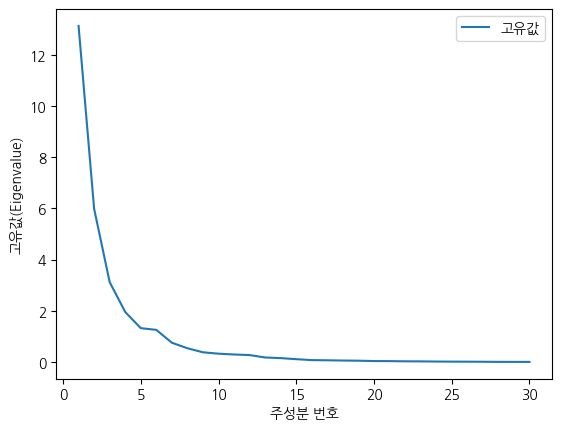

In [106]:
# Scree Plot
plt.plot(df_pca_stat['PrinNo'], df_pca_stat['EigenValues'], label = '고유값')
plt.ylabel('고유값(Eigenvalue)')
plt.xlabel('주성분 번호')
plt.legend(loc = 'best')

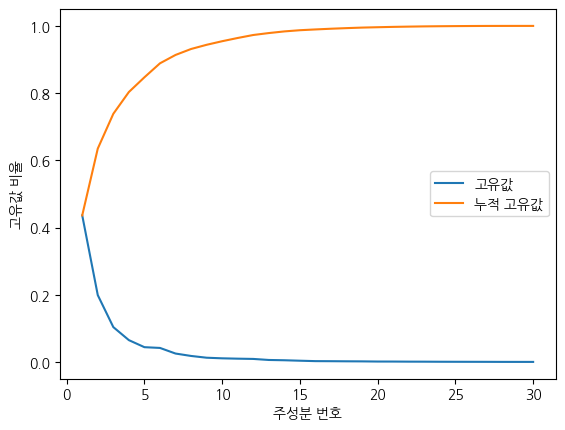

In [107]:
# 고유값 비율 그래프 생성
plt.plot(df_pca_stat['PrinNo'], df_pca_stat['EigenValuesRatio'], label = '고유값')
plt.plot(df_pca_stat['PrinNo'], df_pca_stat['CumEigenValuesRatio'], label = '누적 고유값')
plt.ylabel('고유값 비율')
plt.xlabel('주성분 번호')
plt.legend(loc = 'best')

In [108]:
x_cols = pd.DataFrame({"Feature":df_raw_x.columns})

df_eigenvector = pd.concat([x_cols, pd.DataFrame(pca.components_[:4].T * -1 , \
                                                columns = ["Prin1","Prin2","Prin3","Prin4"])], axis = 1)
df_eigenvector.round(3)

,Feature,Prin1,Prin2,Prin3,Prin4
0,mean_radius,-0.214,0.238,0.026,0.026
1,mean_texture,-0.110,0.046,0.038,-0.604
2,mean_perimeter,-0.225,0.218,0.024,0.029
3,mean_area,-0.213,0.245,-0.002,0.040
4,mean_smoothness,-0.151,-0.194,0.058,0.201
5,mean_compactness,-0.240,-0.163,0.046,0.053
6,mean_concavity,-0.261,-0.046,0.003,0.046
7,mean_concave_points,-0.260,0.039,0.035,0.086
8,mean_symmetry,-0.147,-0.197,0.047,0.138
9,mean_fractal_dimension,-0.076,-0.351,-0.000,0.080


In [109]:
df_eigenvector = df_eigenvector.reindex(df_eigenvector['Prin1'].abs().sort_values(ascending=False).index)
df_eigenvector.head().round(3)

,Feature,Prin1,Prin2,Prin3,Prin4
6,mean_concavity,-0.261,-0.046,0.003,0.046
7,mean_concave_points,-0.260,0.039,0.035,0.086
27,worst_concave_points,-0.247,-0.010,0.180,0.034
5,mean_compactness,-0.240,-0.163,0.046,0.053
22,worst_perimeter,-0.233,0.202,0.083,0.008


In [110]:
df_eigenvector = df_eigenvector.reindex(df_eigenvector['Prin2'].abs().sort_values(ascending=False).index)
df_eigenvector.head().round(3)

,Feature,Prin1,Prin2,Prin3,Prin4
9,mean_fractal_dimension,-0.076,-0.351,-0.000,0.080
29,worst_fractal_dimension,-0.124,-0.289,0.208,-0.046
19,fractal_dimension_error,-0.127,-0.246,-0.237,-0.049
3,mean_area,-0.213,0.245,-0.002,0.040
0,mean_radius,-0.214,0.238,0.026,0.026


In [111]:
df_eigenvector = df_eigenvector.reindex(df_eigenvector['Prin3'].abs().sort_values(ascending=False).index)
df_eigenvector.head().round(3)

,Feature,Prin1,Prin2,Prin3,Prin4
14,smoothness_error,-0.033,-0.125,-0.373,0.014
11,texture_error,-0.050,-0.062,-0.346,-0.359
18,symmetry_error,-0.064,-0.147,-0.285,0.057
17,concave_points_error,-0.186,-0.074,-0.272,0.006
28,worst_symmetry,-0.111,-0.184,0.239,0.041


In [112]:
df_eigenvector = df_eigenvector.reindex(df_eigenvector['Prin4'].abs().sort_values(ascending=False).index)
df_eigenvector.head().round(3)

,Feature,Prin1,Prin2,Prin3,Prin4
21,worst_texture,-0.106,0.011,0.148,-0.609
1,mean_texture,-0.110,0.046,0.038,-0.604
11,texture_error,-0.050,-0.062,-0.346,-0.359
4,mean_smoothness,-0.151,-0.194,0.058,0.201
8,mean_symmetry,-0.147,-0.197,0.047,0.138


In [113]:
# Prin4까지만 슬라이스
df_pca_slice = df_pca.iloc[:, :4]
print(df_pca_slice)

         Prin1     Prin2     Prin3     Prin4
0    -2.003897 -0.258058 -1.848903 -1.314675
1    -5.849067  0.211648 -0.168087 -2.956419
2    -1.549048 -2.925664 -2.442463 -0.465868
3    -3.112491 -1.321534 -1.219585 -1.443804
4    -5.824799 -1.678924  0.057293 -1.501697
..         ...       ...       ...       ...
315   3.203038 -0.265636  4.051026  1.690832
316   3.421096  0.860183  2.742605  2.127877
317  11.009894  1.856835  6.817009 -1.306914
318   6.626788  2.463363  5.945138  1.983595
319  -4.992963 -1.060560  0.903713  0.687164

[320 rows x 4 columns]


In [114]:
# df_pca_slice에 종속변수 열 추가
df_pca_slice_xy = pd.concat([df_raw_y, df_pca_slice], axis=1)
df_pca_slice_xy

,diagnosis,Prin1,Prin2,Prin3,Prin4
0,음성,-2.003897,-0.258058,-1.848903,-1.314675
1,양성,-5.849067,0.211648,-0.168087,-2.956419
2,음성,-1.549048,-2.925664,-2.442463,-0.465868
3,양성,-3.112491,-1.321534,-1.219585,-1.443804
4,양성,-5.824799,-1.678924,0.057293,-1.501697
...,...,...,...,...,...
315,음성,3.203038,-0.265636,4.051026,1.690832
316,음성,3.421096,0.860183,2.742605,2.127877
317,음성,11.009894,1.856835,6.817009,-1.306914
318,음성,6.626788,2.463363,5.945138,1.983595


,Prin1,Prin2,Prin3,Prin4
Prin1,1.0,0.0,-0.0,-0.0
Prin2,0.0,1.0,-0.0,-0.0
Prin3,-0.0,-0.0,1.0,-0.0
Prin4,-0.0,-0.0,-0.0,1.0


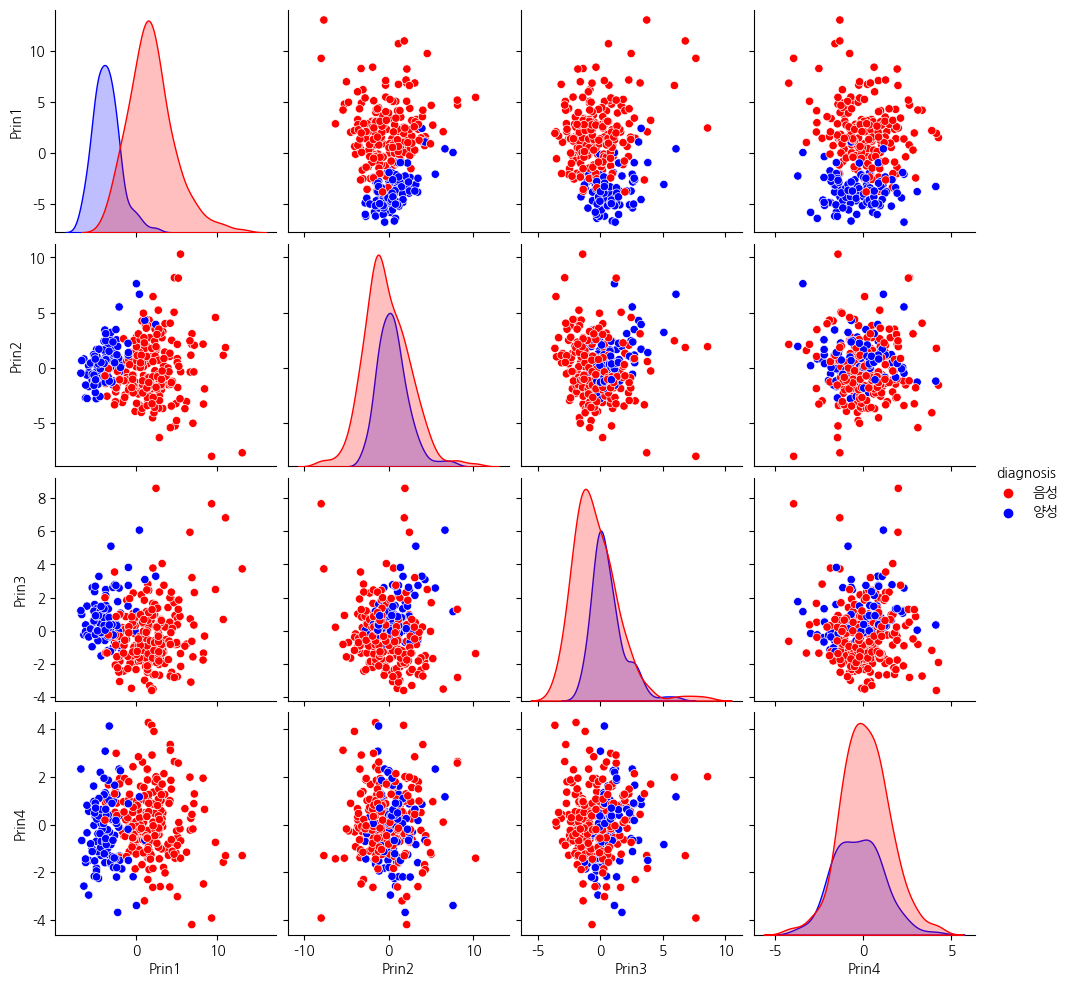

In [115]:
# 데이터 시각화 및 상관계수 확인
sns.pairplot(df_pca_slice_xy, hue="diagnosis", palette=["red", "blue"])
df_pca_slice.corr().round(3)